In [89]:
import pandas as pd
import datetime as dt
import numpy as np
import pymc3 as py
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/ggiorcelli/desktop/test_py.csv", sep=",")
df.head()

,day,leads,delta
0,1/1/17,10,-2
1,1/2/17,8,3
2,1/3/17,11,-4
3,1/4/17,7,3
4,1/5/17,10,1


In [23]:
def get_delta(field):
    list=[0]
    for i in range(1,len(field)):
        delta_2 = field[i]-field[i-1]
        list.append(delta_2)
    return(list)
        
delta2 = get_delta(df['leads'])   
delta2

[0, -2, 3, -4, 3, 1, 6, -7, 2, 4]

In [24]:
results = { 'day': df['day'],
         'leads' : df['leads'],
         'delta' : get_delta(df['leads'])
          }

df1 = pd.DataFrame.from_dict(results)[['day','leads', 'delta']]
df1

,day,leads,delta
0,1/1/17,10,0
1,1/2/17,8,-2
2,1/3/17,11,3
3,1/4/17,7,-4
4,1/5/17,10,3
5,1/6/17,11,1
6,1/7/17,17,6
7,1/8/17,10,-7
8,1/9/17,12,2
9,1/10/17,16,4


In [36]:
delta2 = get_delta(df['leads']) 
delta2

[0, -2, 3, -4, 3, 1, 6, -7, 2, 4]

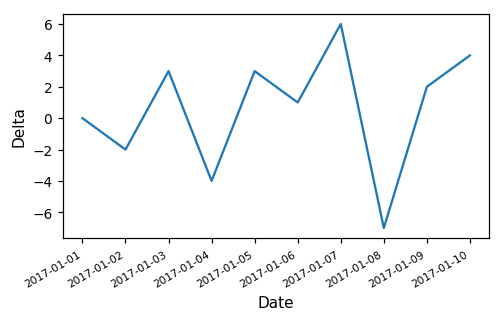

In [117]:
import matplotlib

x = [dt.datetime.strptime(d,'%m/%d/%y').date() for d in results['day']]
y = results['delta']

fig = plt.figure(figsize=(5,3), dpi=110)

plt.plot(x,y)
plt.ylabel('Delta')
plt.xlabel('Date')

fig.autofmt_xdate()
matplotlib.rc('xtick',labelsize=7)
matplotlib.rc('ytick',labelsize=9)

plt.show()